## KNN
- 유유상종 : 끼리끼리 모임
- K Nearest Neighbors
- K개의 가장 가까이 존재하는 데이터를  
기준으로 결과를 정하는 알고리즘
- 데이터와 데이터의 거리를 도출 후 거리 순으로 정렬
- K개 만큼 가까이 있는 데이터를 도출
> - 분류: 다수결원칙으로 많은 종류의 데이터로 결론 도출
> - 회귀: 데이터의 평균값으로 결과를 도출
- 특징
> - 데이터의 규칙/패털을 나타내는 수식이 없음 
> - 데이터를 메모리 모두 저장 후 거리를 측정해서 결과 도출 (Lazy 학습) 

## scikit-learn 패키지
기계학습 방법  
1. 학습 모델 인스턴스 생성
2. fit 메서드 사용하여 데이터 학습
> fit(2D, 1D(라벨))
3. score 에서드 사용하여 학습 테스트
> score(2D, 1D(라벨))
4. 활용 메서드 => predict(2D) ----> 결과


### 목표 : 생성 품중 분류 모델
- 데이터 : 2가지 품종의 생선 데이터로 fish.csv
- Feature : Weight, Length
- Target : Species
- 유형 : 지도학습 / 분류
- 최적의 생선 품종 예측

#### 모듈 준비 & 데이터 준비

In [2]:

from sklearnex import patch_sklearn, unpatch_sklearn
patch_sklearn()
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
# 5개의 피쳐/특성 중 2개의 피쳐/특성 선택
df = pd.read_csv("../data/fish.csv", usecols=["Weight", "Length", "Species"])
df.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [4]:
df['Species'] = df['Species'].astype('category')
mask = df['Species'].isin(['Bream', 'Smelt'])
fishDF = df[mask].copy()
fishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [5]:
fishDF.reset_index(drop=True, inplace=True)
fishDF['Species'] = fishDF['Species'].cat.codes
fishDF

,Species,Weight,Length
0,0,242.0,25.4
1,0,290.0,26.3
2,0,340.0,26.5
3,0,363.0,29.0
4,0,430.0,29.0
5,0,450.0,29.7
6,0,500.0,29.7
7,0,390.0,30.0
8,0,450.0,30.0
9,0,500.0,30.7


#### 데이터 전처리 <hr>
- 정제 : 결측치, 중복데이터 
- 정규화 : feature scaling

#### (3-1) 학습 / 테스트 데이터셋 분리 <hr>
- 지도학습 중 분류 = > [고려] 타켓의 비율
- 학습 : 테스트 = 80 : 20
- 

In [6]:
from sklearn.model_selection import train_test_split

# 학습 데이터셋 생성
X = fishDF.drop('Species', axis=1)
y = fishDF['Species']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)


In [7]:
# 학습 및 테스트 데이터셋 확인 
print(f"학습용 데이터셋---->\n{X_train.shape}, {y_train.shape}\n")
print(f"\n {y_train.value_counts() / y_train.shape[0]}\n")
print(f"테스트용 데이터셋---->\n{X_test.shape}, {y_test.shape}\n")
print(f"\n {y_test.value_counts() / y_test.shape[0]}\n")


학습용 데이터셋---->
(39, 2), (39,)


 Species
0    0.717949
5    0.282051
Name: count, dtype: float64

테스트용 데이터셋---->
(10, 2), (10,)


 Species
0    0.7
5    0.3
Name: count, dtype: float64


#### (3-2) 피쳐 데이터의 스케일링 : 피쳐들의 값의 범위가 다른 것을 통일시켜줌 <hr>
- 피쳐들의 값의 범위가 다른 것을 통일 시켜줌
- scikit-learn의 preprocessing 모듈 활용


In [8]:
from sklearn.preprocessing import StandardScaler

# 표준정규분포 스케일링 : 평균 0, 편차 1
# (1) 스케일러 인스턴스 생성
# (2) 데이터에 대한 평균, 표준편차 계산 진행 : fit() 메서드
# (3) 데이터 스케일링 : transform() 메서드

scaler = StandardScaler()
scaler.fit(X_train)
# 학습용 데이터 피쳐 스케일링
scaled_X_train = scaler.transform(X_train)
scaled_X_train

# scaled_features = scaler.fit_transform(fishDF[fishDF.columns[1:]])
# scaled_features

array([[ 0.49638249,  0.50310895],
       [-1.33243816, -1.57164548],
       [ 0.18657042,  0.37467177],
       [ 0.86815697,  0.79950244],
       [-1.30145695, -1.24561264],
       [-1.32097511, -1.43332852],
       [-1.32469285, -1.45308808],
       [-0.61274472, -0.14895673],
       [ 0.74423214,  0.79950244],
       [-1.33925402, -1.62104439],
       [-1.33212834, -1.55188591],
       [ 1.50327171,  1.24409267],
       [ 0.84956824,  0.89830027],
       [-0.46403493, -0.06003868],
       [ 0.80619455,  0.60190678],
       [ 1.48778111,  1.14529484],
       [ 1.73563076,  0.9970981 ],
       [-1.33181853, -1.49260721],
       [-0.23787212,  0.20671546],
       [ 0.5583449 ,  0.75010352],
       [ 0.18657042,  0.40431112],
       [-1.33150872, -1.49260721],
       [ 0.03166438,  0.27587394],
       [-1.33212834, -1.47284765],
       [ 0.80619455,  0.79950244],
       [-1.33553628, -1.54200613],
       [ 0.18657042,  0.45371003],
       [ 1.65817774,  1.39228942],
       [ 0.65128852,

In [9]:
# 테스트용 데이터 치펴 스케일링
scaled_X_test = scaler.transform(X_test)
scaled_X_test

array([[ 0.49638249,  0.50310895],
       [ 0.41892947,  0.70070461],
       [-1.32469285, -1.37404982],
       [ 1.58072473,  1.39228942],
       [ 0.88364757,  0.79950244],
       [-1.34080308, -1.61116461],
       [-1.30083733, -1.17645416],
       [ 1.27091266,  0.89830027],
       [ 0.18657042,  0.27587394],
       [-0.15422286,  0.30551329]])

#### (3-3) 시각화


In [10]:
# 모듈 로딩
import matplotlib.pyplot as plt

In [11]:
X_train

,Weight,Length
15,600.0,32.0
38,9.7,11.0
9,500.0,30.7
26,720.0,35.0
47,19.7,14.3
45,13.4,12.4
44,12.2,12.2
0,242.0,25.4
23,680.0,35.0
36,7.5,10.5


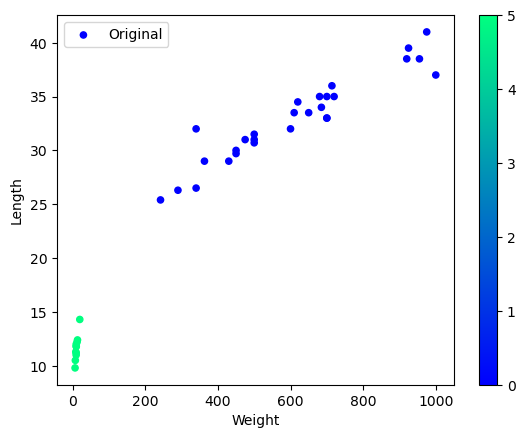

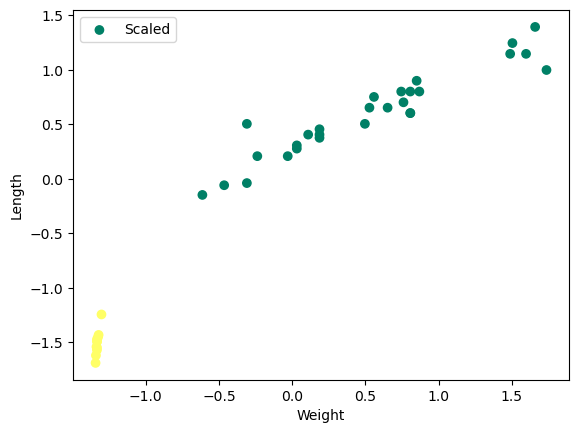

In [12]:
## => 원본 데이터 시각화

X_train.plot(kind='scatter', x='Weight', y='Length', c=y_train, label='Original', colormap='winter')
plt.show()
## => 스케일된 데이터 시각화

plt.scatter(scaled_X_train[:,0], scaled_X_train[:,1], c=y_train, label='Scaled', cmap='summer')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.legend()
plt.show()


#### (4) 학습 진행

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## 모델 성능 좌우하는 매개변수 => 하이퍼파라미터 : n_neighbors
## n_neighbors 즉 k 갯수 : 1 ~ 학습한 데이터 수
patch_sklearn()
# unpatch_sklearn()
train_scorelist = []
test_scorelist = []
for model in [
    # KNeighborsClassifier, 
    SVC, 
    # LogisticRegression,
]:
    for n in range(1, scaled_X_train.shape[0]+1):
        fishModel = model(C=n)
        fishModel.fit(scaled_X_train, y_train)
        fishModel.score(scaled_X_test, y_test)
        #### (6) 예측 <hr>
        
        new_data = pd.DataFrame([[112.0, 25.4], [100.0, 26.3], [98.0, 28.0], [10, 20]], columns=['Weight', 'Length'])
        new_data
        # 피쳐 스케일링 진행
        scaler.transform(new_data)
        y_pre = fishModel.predict(scaler.transform(new_data))
        # print(y_pre, model)
        test_scorelist.append(fishModel.score(scaled_X_test, y_test))
        train_scorelist.append(fishModel.score(scaled_X_train, y_train))

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


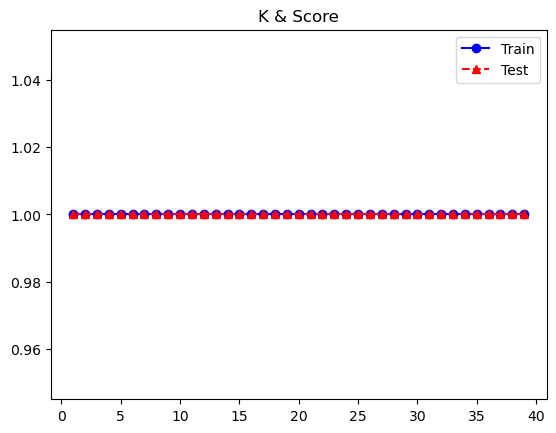

In [73]:
plt.plot(range(1, scaled_X_train.shape[0]+1), train_scorelist, 'bo-',label='Train')
plt.plot(range(1, scaled_X_train.shape[0]+1), test_scorelist, 'r^--',label='Test')
plt.legend()
plt.title('K & Score')
plt.show()


#### 기계학습 데이터셋 준비 => 피쳐와 타켓 분리 <hr>
